In [41]:
import pickle
import glob
import torch
import numpy as np
import seaborn as sns

num_clients = 10

In [42]:
# Antonio - Unibo
# s0.95
# lr0.5
# lda1.0
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-18/20-20-39/working" # pp
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-18/14-55-39/working" # topk
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-18/14-56-02/working" # swat

# s0.9
# lr0.5
# lda1.0
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-18/20-20-39/working" # pp -
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-18/14-55-39/working" # topk -
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-24/09-28-49/working" # swat
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-24/14-33-58/working" # swat + pp

# lr0.1
# lda1.0
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-21/15-27-13/working" # pp
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-24/07-28-12/working" # pp
# directory_path = "/home/aguastella/fl_powerpropagation/outputs/2024-06-21/14-05-50/working" # topk
# directory_path =  "/home/aguastella/fl_powerpropagation/outputs/2024-06-21/18-26-35/working" # swat

In [43]:
# zeph
# TOP-K
# global_directory_path =   "/home/zep/fl_powerpropagation/outputs/2024-07-29/17-28-42/working" # top-k
# clients_directory_path =  "/home/zep/fl_powerpropagation/outputs/2024-07-29/17-28-42/working/client_masks" # top-k
# global_directory_path =   "/home/zep/fl_powerpropagation/outputs/2024-07-29/18-23-34/working" # top-k
# clients_directory_path =  "/home/zep/fl_powerpropagation/outputs/2024-07-29/18-23-34/working/client_masks" # top-k
# # lda0.1
# global_directory_path =   "/home/zep/fl_powerpropagation/outputs/2024-07-30/12-54-09/working" # top-k
# clients_directory_path =  "/home/zep/fl_powerpropagation/outputs/2024-07-30/12-54-09/working/client_masks" # top-k
# # before pruning
# global_directory_path =   "/home/zep/fl_powerpropagation/outputs/2024-07-30/15-44-37/working" # top-k
# clients_directory_path =  "/home/zep/fl_powerpropagation/outputs/2024-07-30/15-44-37/working/client_masks" # top-k
# fedAvgNZ
# global_directory_path =   "/home/zep/fl_powerpropagation/outputs/2024-07-30/16-26-03/working" # top-k
# clients_directory_path =  "/home/zep/fl_powerpropagation/outputs/2024-07-30/16-26-03/working/client_masks" # top-k
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/16-35-20/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/16-35-20/working/client_masks"

# POWERPROP
# global_directory_path =   "/home/zep/fl_powerpropagation/outputs/2024-07-29/18-02-37/working" # pp
# clients_directory_path =  "/home/zep/fl_powerpropagation/outputs/2024-07-29/18-02-37/working/client_masks" # pp
# global_directory_path =   "/home/zep/fl_powerpropagation/outputs/2024-07-29/18-30-23/working" # pp
# clients_directory_path =  "/home/zep/fl_powerpropagation/outputs/2024-07-29/18-30-23/working/client_masks" # pp
# lda0.1
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-30/13-00-05/working" # pp
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-30/13-00-05/working/client_masks" # pp
# before pruning
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-30/15-51-15/working" # pp
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-30/15-51-15/working/client_masks" # pp
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/17-09-04/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/17-09-04/working/client_masks"

# SWAT
# lda0.1
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-30/17-19-50/working" # pp
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-30/17-19-50/working/client_masks" # pp
# ZEROFL
# lda1000.0
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/10-47-25/working" # pp
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/10-47-25/working/client_masks" # pp
# lda0.1
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/10-35-23/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/10-35-23/working/client_masks"
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/17-31-04/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/17-31-04/working/client_masks"

In [44]:
# LONG TEST
# LDA1000.0
# TOPK
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-08-01/08-52-22/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-08-01/08-52-22/working/client_masks"
# POWERPROP
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-08-01/09-06-43/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-08-01/09-06-43/working/client_masks"
# ZEROFL
global_directory_path = (
    "/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working"
)
clients_directory_path = (
    "/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/client_masks"
)


# LDA0.1
# TOPK
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/16-35-20/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/16-35-20/working/client_masks"
# POWERPROP
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/17-09-04/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/17-09-04/working/client_masks"
# ZEROFL
# global_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/17-31-04/working"
# clients_directory_path = "/home/zep/fl_powerpropagation/outputs/2024-07-31/17-31-04/working/client_masks"

In [45]:
# Utils
import re


sampling_rate = 1


def extract_numbers(filename):
    match = re.search(r"mask_(\d+)_client_(\d+)", filename)
    if match:
        mask_num = int(match.group(1))
        client_num = int(match.group(2))
        return mask_num, client_num
    return None, None


# GLOBAL
# Get a list of all pickle files
global_pickle_files = glob.glob(f"{global_directory_path}/mask_*.pickle")
# print(pickle_files)
# sort by name
global_pickle_files.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))
# remove masks
# global_pickle_files.pop(0)
# pickle_files.pop(1)
# keep only the first 300
# pickle_files = pickle_files[:10]
# keep only one overy 10
print("Global masks: ", global_pickle_files)
global_pickle_files = global_pickle_files[::sampling_rate]

# Load the global masks
global_masks = []
for file in global_pickle_files:
    with open(file, "rb") as f:
        global_mask = pickle.load(f)
        global_masks.append(global_mask)


# CLIENTS
clients_pickle_files = glob.glob(f"{clients_directory_path}/mask_*.pickle")
clients_pickle_files = sorted(clients_pickle_files, key=lambda x: extract_numbers(x))
# Remove the first mask that is form the test client
clients_pickle_files.pop(0)
clients_pickle_files = clients_pickle_files[::sampling_rate]
print("Client masks: ", clients_pickle_files)


# Load the client masks
clients_masks = []
for file in clients_pickle_files:
    with open(file, "rb") as f:
        client_mask = pickle.load(f)
        clients_masks.append(client_mask)

# Ensure each mask is a list of numpy arrays
# masks = [[np.array(layer_mask) for layer_mask in mask] for mask in masks]

Global masks:  ['/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_0.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_1.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_2.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_3.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_4.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_5.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_6.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_7.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_8.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_9.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mask_10.pickle', '/home/zep/fl_powerpropagation/outputs/2024-08-01/08-35-06/working/mas

Reordering layer of the mask

In [46]:
# Assume original_ordered_keys and sorted_ordered_keys are given
original_ordered_keys = {
    0: "net.conv1.weight",
    1: "net.bn1.weight",
    2: "net.bn1.bias",
    3: "net.bn1.running_mean",
    4: "net.bn1.running_var",
    5: "net.bn1.num_batches_tracked",
    6: "net.layer1.0.conv1.weight",
    7: "net.layer1.0.bn1.weight",
    8: "net.layer1.0.bn1.bias",
    9: "net.layer1.0.bn1.running_mean",
    10: "net.layer1.0.bn1.running_var",
    11: "net.layer1.0.bn1.num_batches_tracked",
    12: "net.layer1.0.conv2.weight",
    13: "net.layer1.0.bn2.weight",
    14: "net.layer1.0.bn2.bias",
    15: "net.layer1.0.bn2.running_mean",
    16: "net.layer1.0.bn2.running_var",
    17: "net.layer1.0.bn2.num_batches_tracked",
    18: "net.layer1.1.conv1.weight",
    19: "net.layer1.1.bn1.weight",
    20: "net.layer1.1.bn1.bias",
    21: "net.layer1.1.bn1.running_mean",
    22: "net.layer1.1.bn1.running_var",
    23: "net.layer1.1.bn1.num_batches_tracked",
    24: "net.layer1.1.conv2.weight",
    25: "net.layer1.1.bn2.weight",
    26: "net.layer1.1.bn2.bias",
    27: "net.layer1.1.bn2.running_mean",
    28: "net.layer1.1.bn2.running_var",
    29: "net.layer1.1.bn2.num_batches_tracked",
    30: "net.layer2.0.conv1.weight",
    31: "net.layer2.0.bn1.weight",
    32: "net.layer2.0.bn1.bias",
    33: "net.layer2.0.bn1.running_mean",
    34: "net.layer2.0.bn1.running_var",
    35: "net.layer2.0.bn1.num_batches_tracked",
    36: "net.layer2.0.conv2.weight",
    37: "net.layer2.0.bn2.weight",
    38: "net.layer2.0.bn2.bias",
    39: "net.layer2.0.bn2.running_mean",
    40: "net.layer2.0.bn2.running_var",
    41: "net.layer2.0.bn2.num_batches_tracked",
    42: "net.layer2.0.downsample.0.weight",
    43: "net.layer2.0.downsample.1.weight",
    44: "net.layer2.0.downsample.1.bias",
    45: "net.layer2.0.downsample.1.running_mean",
    46: "net.layer2.0.downsample.1.running_var",
    47: "net.layer2.0.downsample.1.num_batches_tracked",
    48: "net.layer2.1.conv1.weight",
    49: "net.layer2.1.bn1.weight",
    50: "net.layer2.1.bn1.bias",
    51: "net.layer2.1.bn1.running_mean",
    52: "net.layer2.1.bn1.running_var",
    53: "net.layer2.1.bn1.num_batches_tracked",
    54: "net.layer2.1.conv2.weight",
    55: "net.layer2.1.bn2.weight",
    56: "net.layer2.1.bn2.bias",
    57: "net.layer2.1.bn2.running_mean",
    58: "net.layer2.1.bn2.running_var",
    59: "net.layer2.1.bn2.num_batches_tracked",
    60: "net.layer3.0.conv1.weight",
    61: "net.layer3.0.bn1.weight",
    62: "net.layer3.0.bn1.bias",
    63: "net.layer3.0.bn1.running_mean",
    64: "net.layer3.0.bn1.running_var",
    65: "net.layer3.0.bn1.num_batches_tracked",
    66: "net.layer3.0.conv2.weight",
    67: "net.layer3.0.bn2.weight",
    68: "net.layer3.0.bn2.bias",
    69: "net.layer3.0.bn2.running_mean",
    70: "net.layer3.0.bn2.running_var",
    71: "net.layer3.0.bn2.num_batches_tracked",
    72: "net.layer3.0.downsample.0.weight",
    73: "net.layer3.0.downsample.1.weight",
    74: "net.layer3.0.downsample.1.bias",
    75: "net.layer3.0.downsample.1.running_mean",
    76: "net.layer3.0.downsample.1.running_var",
    77: "net.layer3.0.downsample.1.num_batches_tracked",
    78: "net.layer3.1.conv1.weight",
    79: "net.layer3.1.bn1.weight",
    80: "net.layer3.1.bn1.bias",
    81: "net.layer3.1.bn1.running_mean",
    82: "net.layer3.1.bn1.running_var",
    83: "net.layer3.1.bn1.num_batches_tracked",
    84: "net.layer3.1.conv2.weight",
    85: "net.layer3.1.bn2.weight",
    86: "net.layer3.1.bn2.bias",
    87: "net.layer3.1.bn2.running_mean",
    88: "net.layer3.1.bn2.running_var",
    89: "net.layer3.1.bn2.num_batches_tracked",
    90: "net.layer4.0.conv1.weight",
    91: "net.layer4.0.bn1.weight",
    92: "net.layer4.0.bn1.bias",
    93: "net.layer4.0.bn1.running_mean",
    94: "net.layer4.0.bn1.running_var",
    95: "net.layer4.0.bn1.num_batches_tracked",
    96: "net.layer4.0.conv2.weight",
    97: "net.layer4.0.bn2.weight",
    98: "net.layer4.0.bn2.bias",
    99: "net.layer4.0.bn2.running_mean",
    100: "net.layer4.0.bn2.running_var",
    101: "net.layer4.0.bn2.num_batches_tracked",
    102: "net.layer4.0.downsample.0.weight",
    103: "net.layer4.0.downsample.1.weight",
    104: "net.layer4.0.downsample.1.bias",
    105: "net.layer4.0.downsample.1.running_mean",
    106: "net.layer4.0.downsample.1.running_var",
    107: "net.layer4.0.downsample.1.num_batches_tracked",
    108: "net.layer4.1.conv1.weight",
    109: "net.layer4.1.bn1.weight",
    110: "net.layer4.1.bn1.bias",
    111: "net.layer4.1.bn1.running_mean",
    112: "net.layer4.1.bn1.running_var",
    113: "net.layer4.1.bn1.num_batches_tracked",
    114: "net.layer4.1.conv2.weight",
    115: "net.layer4.1.bn2.weight",
    116: "net.layer4.1.bn2.bias",
    117: "net.layer4.1.bn2.running_mean",
    118: "net.layer4.1.bn2.running_var",
    119: "net.layer4.1.bn2.num_batches_tracked",
    120: "net.fc.weight",
    121: "net.fc.bias",
}
sorted_ordered_keys = {
    0: "net.bn1.bias",
    1: "net.bn1.num_batches_tracked",
    2: "net.bn1.running_mean",
    3: "net.bn1.running_var",
    4: "net.bn1.weight",
    5: "net.conv1.weight",
    6: "net.fc.bias",
    7: "net.fc.weight",
    8: "net.layer1.0.bn1.bias",
    9: "net.layer1.0.bn1.num_batches_tracked",
    10: "net.layer1.0.bn1.running_mean",
    11: "net.layer1.0.bn1.running_var",
    12: "net.layer1.0.bn1.weight",
    13: "net.layer1.0.bn2.bias",
    14: "net.layer1.0.bn2.num_batches_tracked",
    15: "net.layer1.0.bn2.running_mean",
    16: "net.layer1.0.bn2.running_var",
    17: "net.layer1.0.bn2.weight",
    18: "net.layer1.0.conv1.weight",
    19: "net.layer1.0.conv2.weight",
    20: "net.layer1.1.bn1.bias",
    21: "net.layer1.1.bn1.num_batches_tracked",
    22: "net.layer1.1.bn1.running_mean",
    23: "net.layer1.1.bn1.running_var",
    24: "net.layer1.1.bn1.weight",
    25: "net.layer1.1.bn2.bias",
    26: "net.layer1.1.bn2.num_batches_tracked",
    27: "net.layer1.1.bn2.running_mean",
    28: "net.layer1.1.bn2.running_var",
    29: "net.layer1.1.bn2.weight",
    30: "net.layer1.1.conv1.weight",
    31: "net.layer1.1.conv2.weight",
    32: "net.layer2.0.bn1.bias",
    33: "net.layer2.0.bn1.num_batches_tracked",
    34: "net.layer2.0.bn1.running_mean",
    35: "net.layer2.0.bn1.running_var",
    36: "net.layer2.0.bn1.weight",
    37: "net.layer2.0.bn2.bias",
    38: "net.layer2.0.bn2.num_batches_tracked",
    39: "net.layer2.0.bn2.running_mean",
    40: "net.layer2.0.bn2.running_var",
    41: "net.layer2.0.bn2.weight",
    42: "net.layer2.0.conv1.weight",
    43: "net.layer2.0.conv2.weight",
    44: "net.layer2.0.downsample.0.weight",
    45: "net.layer2.0.downsample.1.bias",
    46: "net.layer2.0.downsample.1.num_batches_tracked",
    47: "net.layer2.0.downsample.1.running_mean",
    48: "net.layer2.0.downsample.1.running_var",
    49: "net.layer2.0.downsample.1.weight",
    50: "net.layer2.1.bn1.bias",
    51: "net.layer2.1.bn1.num_batches_tracked",
    52: "net.layer2.1.bn1.running_mean",
    53: "net.layer2.1.bn1.running_var",
    54: "net.layer2.1.bn1.weight",
    55: "net.layer2.1.bn2.bias",
    56: "net.layer2.1.bn2.num_batches_tracked",
    57: "net.layer2.1.bn2.running_mean",
    58: "net.layer2.1.bn2.running_var",
    59: "net.layer2.1.bn2.weight",
    60: "net.layer2.1.conv1.weight",
    61: "net.layer2.1.conv2.weight",
    62: "net.layer3.0.bn1.bias",
    63: "net.layer3.0.bn1.num_batches_tracked",
    64: "net.layer3.0.bn1.running_mean",
    65: "net.layer3.0.bn1.running_var",
    66: "net.layer3.0.bn1.weight",
    67: "net.layer3.0.bn2.bias",
    68: "net.layer3.0.bn2.num_batches_tracked",
    69: "net.layer3.0.bn2.running_mean",
    70: "net.layer3.0.bn2.running_var",
    71: "net.layer3.0.bn2.weight",
    72: "net.layer3.0.conv1.weight",
    73: "net.layer3.0.conv2.weight",
    74: "net.layer3.0.downsample.0.weight",
    75: "net.layer3.0.downsample.1.bias",
    76: "net.layer3.0.downsample.1.num_batches_tracked",
    77: "net.layer3.0.downsample.1.running_mean",
    78: "net.layer3.0.downsample.1.running_var",
    79: "net.layer3.0.downsample.1.weight",
    80: "net.layer3.1.bn1.bias",
    81: "net.layer3.1.bn1.num_batches_tracked",
    82: "net.layer3.1.bn1.running_mean",
    83: "net.layer3.1.bn1.running_var",
    84: "net.layer3.1.bn1.weight",
    85: "net.layer3.1.bn2.bias",
    86: "net.layer3.1.bn2.num_batches_tracked",
    87: "net.layer3.1.bn2.running_mean",
    88: "net.layer3.1.bn2.running_var",
    89: "net.layer3.1.bn2.weight",
    90: "net.layer3.1.conv1.weight",
    91: "net.layer3.1.conv2.weight",
    92: "net.layer4.0.bn1.bias",
    93: "net.layer4.0.bn1.num_batches_tracked",
    94: "net.layer4.0.bn1.running_mean",
    95: "net.layer4.0.bn1.running_var",
    96: "net.layer4.0.bn1.weight",
    97: "net.layer4.0.bn2.bias",
    98: "net.layer4.0.bn2.num_batches_tracked",
    99: "net.layer4.0.bn2.running_mean",
    100: "net.layer4.0.bn2.running_var",
    101: "net.layer4.0.bn2.weight",
    102: "net.layer4.0.conv1.weight",
    103: "net.layer4.0.conv2.weight",
    104: "net.layer4.0.downsample.0.weight",
    105: "net.layer4.0.downsample.1.bias",
    106: "net.layer4.0.downsample.1.num_batches_tracked",
    107: "net.layer4.0.downsample.1.running_mean",
    108: "net.layer4.0.downsample.1.running_var",
    109: "net.layer4.0.downsample.1.weight",
    110: "net.layer4.1.bn1.bias",
    111: "net.layer4.1.bn1.num_batches_tracked",
    112: "net.layer4.1.bn1.running_mean",
    113: "net.layer4.1.bn1.running_var",
    114: "net.layer4.1.bn1.weight",
    115: "net.layer4.1.bn2.bias",
    116: "net.layer4.1.bn2.num_batches_tracked",
    117: "net.layer4.1.bn2.running_mean",
    118: "net.layer4.1.bn2.running_var",
    119: "net.layer4.1.bn2.weight",
    120: "net.layer4.1.conv1.weight",
    121: "net.layer4.1.conv2.weight",
}

# Create a mapping from sorted order to original order
index_mapping = {v: k for k, v in original_ordered_keys.items()}
sorted_indices = [
    index_mapping[sorted_ordered_keys[i]] for i in range(len(sorted_ordered_keys))
]


# Function to reorder masks
def reorder_masks(mask_list):
    reordered_mask_list = []
    for round_masks in mask_list:
        reordered_masks = [None] * len(round_masks)
        for i, sorted_index in enumerate(sorted_indices):
            reordered_masks[sorted_index] = round_masks[i]
        reordered_mask_list.append(reordered_masks)
    return reordered_mask_list


# masks = reorder_masks(masks)
global_masks = reorder_masks(global_masks)
clients_masks = reorder_masks(clients_masks)


# Printing the reordered masks for verification
# for i, round_masks in enumerate(reordered_masks):
#     print(f"Round {i+1} reordered masks:")
#     for j, mask in enumerate(round_masks):
#         print(f"Layer {j}: {mask}")

In [47]:
# for mask in masks:
#     for m in mask:
#         if m.shape != (10, ) and m.shape != (64, ) and m.shape != () and m.shape != (128,) and m.shape != (256,) and m.shape != (512,):
#             print(m.shape)
#             # print the type of mask
#     # print(len(mask))

In [48]:
# # Define the directory containing the .bin files
# directory_path = "/home/zep/fl_powerpropagation/outputs/2024-06-11/18-26-01/results/parameters"

# # Get a list of all .bin files
# bin_files = sorted(glob.glob(f"{directory_path}/parameters*.bin"))

# # Load the model parameters
# models = []
# for file in bin_files:
#     try:
#         # Attempt to load using torch.load
#         model_state = torch.load(file)
#         models.append(model_state)
#     except Exception as e:
#         print(f"Error loading {file}: {e}")

# # Convert model parameters to binary masks
# masks = []
# for model_state in models:
#     mask = [param != 0 for param in model_state.values()]
#     masks.append(mask)

In [49]:
# Ensure each mask is a list of numpy arrays
# masks = [[np.array(layer_mask) for layer_mask in mask] for mask in masks]

In [50]:
# Function to compute overlap percentage between two masks
# def compute_overlap_percentage(mask1, mask2):
#     total_weights = sum(m1.size for m1 in mask1)  # Total number of weights
#     overlap_weights = sum(
#         np.sum(m1 & m2) for m1, m2 in zip(mask1, mask2)
#     )  # Overlapping weights
#     return (overlap_weights / total_weights) * 100  # Percentage of overlap


def intersection_over_union(mask1, mask2):
    intersection = sum(np.sum(m1 & m2) for m1, m2 in zip(mask1, mask2))
    union = sum(np.sum(m1 | m2) for m1, m2 in zip(mask1, mask2))
    # print(intersection, union)
    return intersection / union


# Compute overlap percentage between consecutive masks
# overlap_percentages = [
#     intersection_over_union(global_masks[i], global_masks[i + 1]) for i in range(len(global_masks) - 1)
# ]

# Compute the overlap percentage between the global masks and the client masks
# Each global mask is compared to each client mask for the same round (10 masks for round)
# overlap_percentages = [intersection_over_union(global_masks[i], clients_masks[j]) for i in range(len(global_masks)-1) for j in range(num_clients)]
overlap_percentages = []
for i in range(len(global_masks) - 1):
    for j in range(i * num_clients, i * num_clients + num_clients):
        # print(f"i: {i}, j: {j}")
        overlap_percentages.append(
            intersection_over_union(global_masks[i], clients_masks[j])
        )
        # print(f"Round {i+1} Client {j+1}:")
        # print(f"Masks paths: {(global_pickle_files[i], clients_pickle_files[j])}")
        # print(
        #     "IoU global vs client:"
        #     f" {intersection_over_union(global_masks[i], clients_masks[j])}"
        # )
        # # print(f"IoU consecutive clients: {intersection_over_union(clients_masks[j], clients_masks[j+1])}")
        # print()

[0.05077277142050343, 0.050772930319804774, 0.05077291669982569, 0.050772871299948175, 0.05077276688053801, 0.05077279866031303, 0.05077281682020233, 0.050772803200284135, 0.05077288037991718, 0.050772871299948175, 0.24644345203008938, 0.22592223273388462, 0.25786111603446726, 0.25188299320648433, 0.24664320681311108, 0.24771926376774736, 0.2541759546353339, 0.22337416017206024, 0.2290620749013451, 0.25642431003540767, 0.3549667623193317, 0.36294414825246735, 0.33116732483850453, 0.35065665093141213, 0.34971667889975533, 0.346301407673199, 0.3383242856888077, 0.3706403946423729, 0.36263763893098744, 0.2791537782719695, 0.3575525785862521, 0.34758145230241794, 0.2799003103098877, 0.3499038469566379, 0.35103653190927847, 0.3600248423520043, 0.35869814123218036, 0.33945135270222876, 0.3452922198362385, 0.33622174518202025, 0.34303142259182745, 0.34360161263215017, 0.35177217407602074, 0.34523235909679767, 0.33510644005955814, 0.3383315841808487, 0.3374656498807404, 0.34933665750215553, 0.

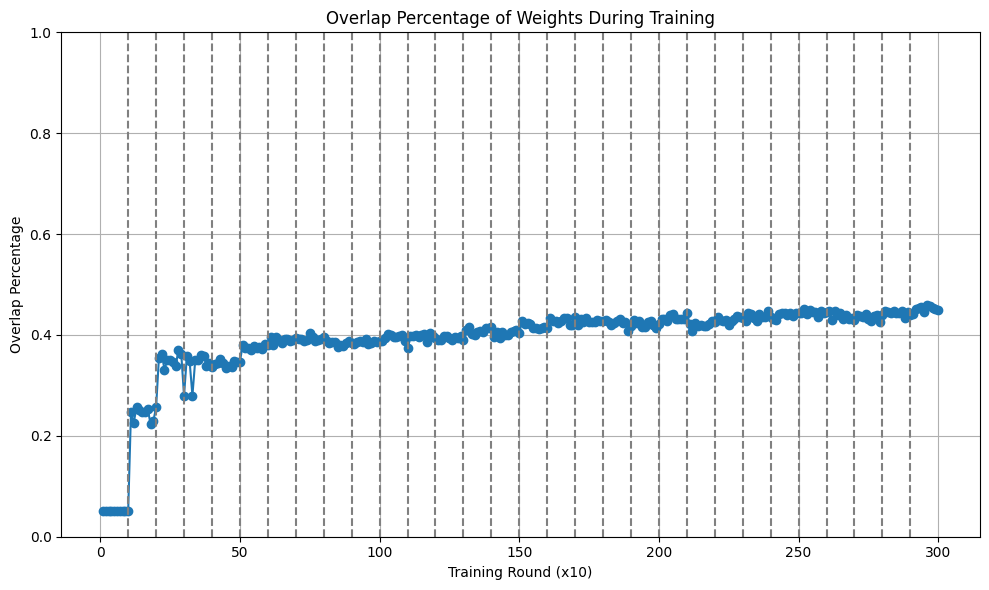

In [51]:
import matplotlib.pyplot as plt

print(overlap_percentages)

# Plot overlap percentage over time
rounds = range(1, len(overlap_percentages) + 1)
plt.figure(figsize=(10, 6))
plt.plot(rounds, overlap_percentages, marker="o")
plt.xlabel("Training Round (x10)")
plt.ylabel("Overlap Percentage")
plt.title("Overlap Percentage of Weights During Training")
for i in range(1, len(overlap_percentages) // 10):
    plt.axvline(x=i * 10, color="grey", linestyle="--")
plt.grid(True)
plt.ylim(0, 1.0)  # Set the y-axis limits
plt.tight_layout()
plt.show()

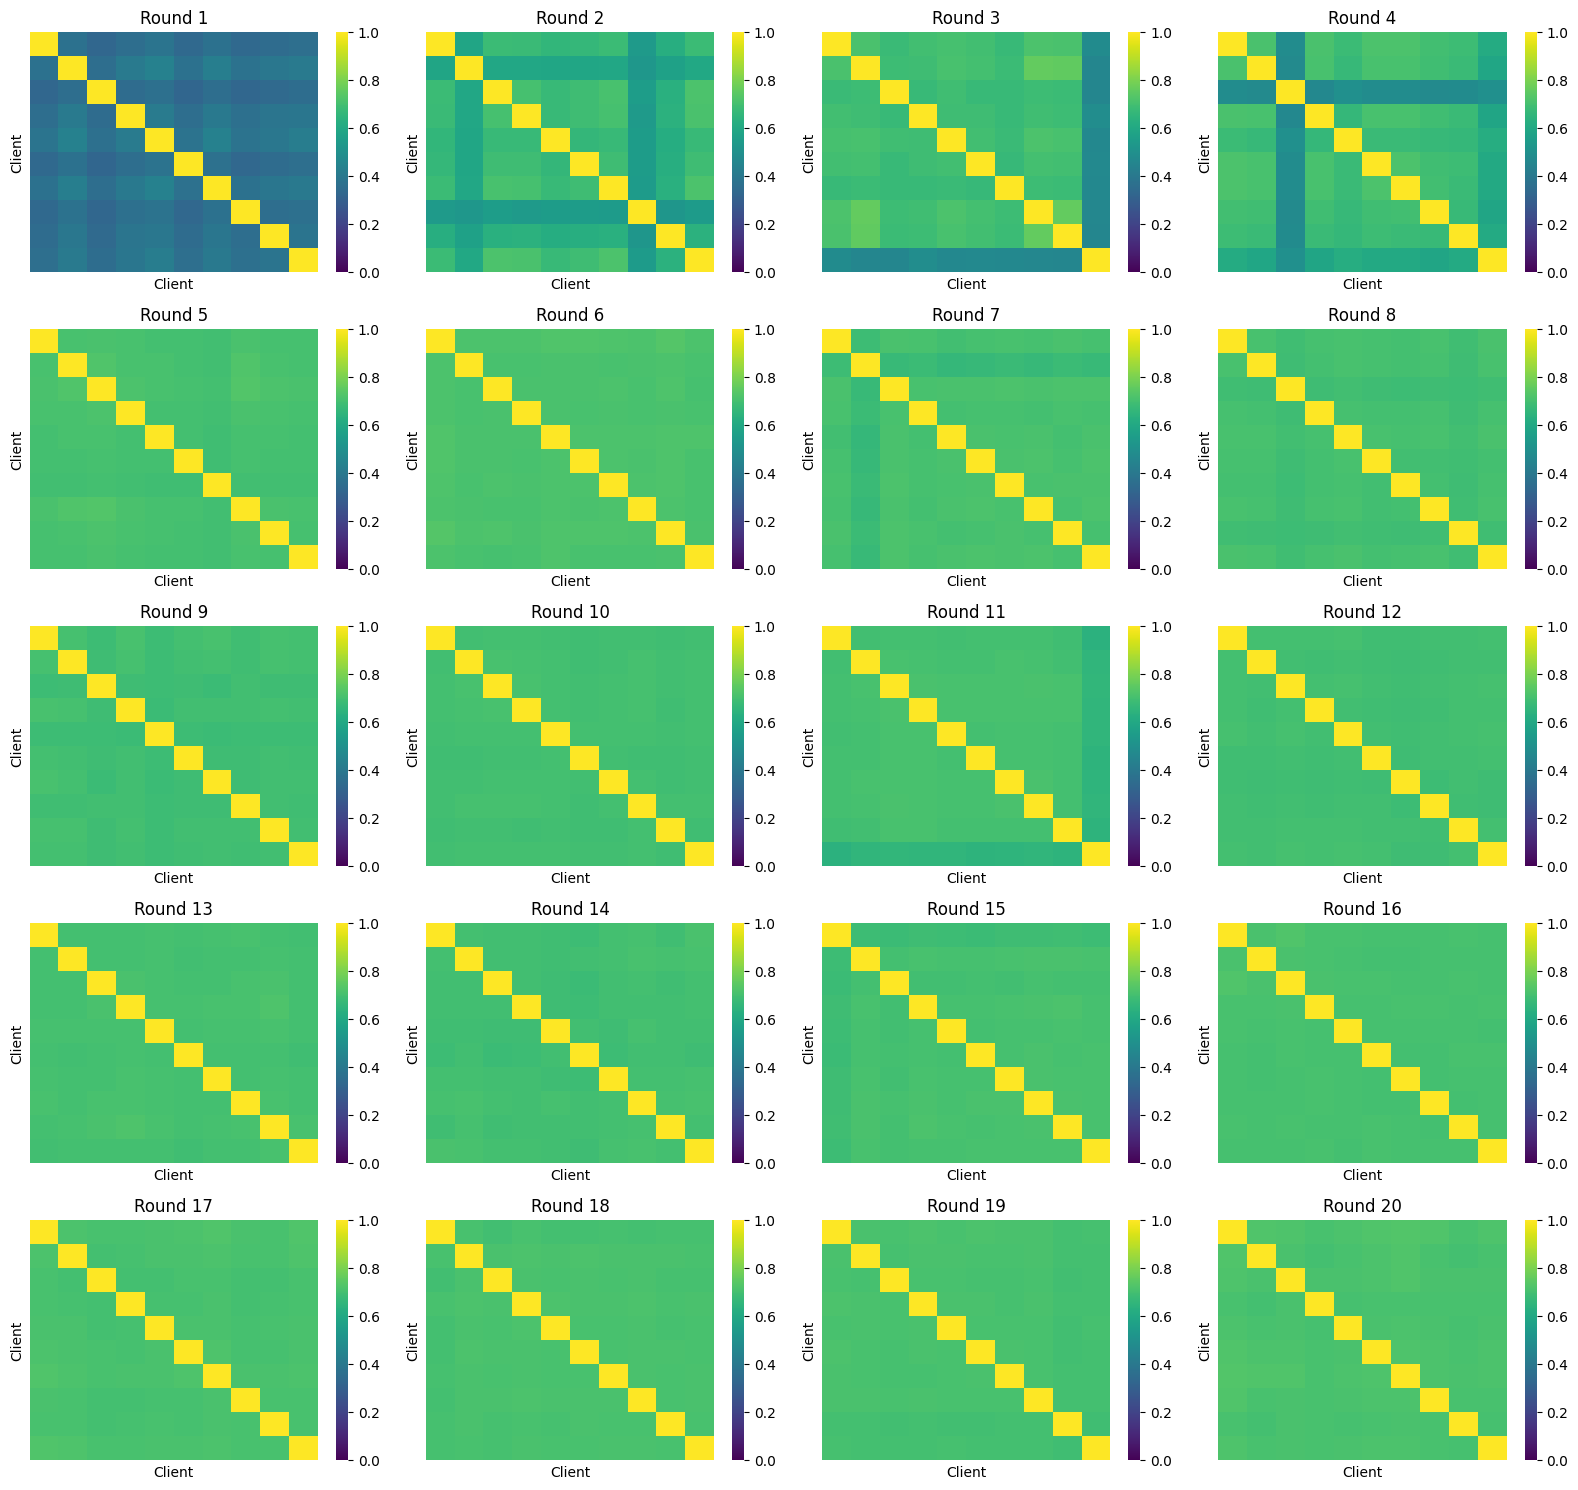

In [53]:
def compute_heatmap(ax, round):
    # Compute the overlap percentage between the client masks for a given round
    overlap_percentages = [
        intersection_over_union(
            clients_masks[round * num_clients + i],
            clients_masks[round * num_clients + j],
        )
        for i in range(num_clients)
        for j in range(i + 1, num_clients)
    ]

    # Create a heatmap of the overlap percentages
    heatmap = np.zeros((num_clients, num_clients))
    for i in range(num_clients):
        for j in range(i + 1, num_clients):
            heatmap[i, j] = overlap_percentages.pop(0)
            heatmap[j, i] = heatmap[i, j]
    # fill the diagonal
    np.fill_diagonal(heatmap, 1.0)

    # Plot the heatmap in the provided axis
    sns.heatmap(
        heatmap,
        annot=False,
        fmt=".2f",
        cmap="viridis",
        xticklabels="",
        yticklabels="",
        vmin=0,
        vmax=1.0,
        ax=ax,
    )
    ax.set_xlabel("Client")
    ax.set_ylabel("Client")
    ax.set_title(f"Round {round+1}")
    ax.set_xticks([])
    ax.set_yticks([])


# Determine the number of rounds
# num_rounds = len(global_masks) - 1
num_rounds = 20

# Determine the grid size for subplots
cols = 4  # You can adjust this value to fit your needs
rows = (num_rounds + cols - 1) // cols  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows))
axes = axes.flatten()  # Flatten the array of axes

# Plot each heatmap in the respective subplot
for i in range(num_rounds):
    compute_heatmap(axes[i], i)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()